Model Data Citation
Natarajan, M. (2006). Understanding the Structure of a Large Heroin Distribution Network: A Quantitative Analysis of Qualitative Data. Quantitative Journal of Criminology, 22(2), 171-192. Retrieved from: https://sites.google.com/site/ucinetsoftware/datasets/covert-networks/cocainedealingnatarajan. 

In [1]:
import csv
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

DIRNAME = 'dealing/'

In [2]:
# load network data from .csv
dat = pd.read_csv(DIRNAME + 'COCAINE_DEALING.csv', index_col=0)
# print full data frame to confirm person removed in section II:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# set nx.Graph
G = nx.Graph()

In [3]:
# review data
print(dat)

         Bill  Blacky  Bruce  Charles  Dante  David  Donald  Doug  Fabio  \
Bill        0       0      0        0      0      0       0     0      0   
Blacky      0       0      0        0      1      0       0     0      0   
Bruce       0       0      0        0      0      0       0     0      0   
Charles     0       0      0        0      0      0       0     0      0   
Dante       0       0      0        0      0      0       0     0      0   
David       0       0      0        0      0      0       0     0      0   
Donald      0       0      0        0      0      0       0     0      0   
Doug        0       0      0        0      0      0       0     0      0   
Fabio       0       0      0        0      0      0       0     0      0   
Frank       0       0      0        0      0      0       0     0      0   
Gabriel     0       0      0        0      0      0       0     0      0   
Howard      0       0      0        0      0      0       0     0      0   
Jenny       

In [4]:
# add nodes
G.add_nodes_from(dat.columns)

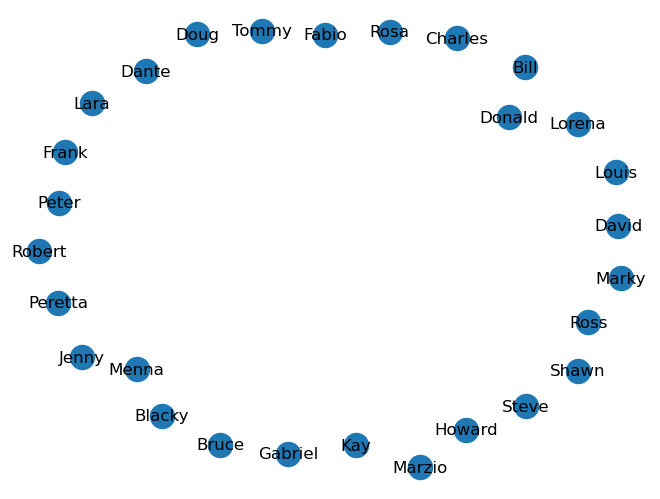

In [5]:
# confirm nodes added
nx.draw(G, with_labels=True)
plt.show()

In [6]:
# time to add the edges...
for source, row in dat.items():
    for target, weight in row.items():
        try:
            weight = int(weight)  # dat has non-integers. Need to separate them out
            if weight > 0:
                G.add_edge(source, target, weight=weight)
        except ValueError:
            pass  # Ignore non-numeric values/errors

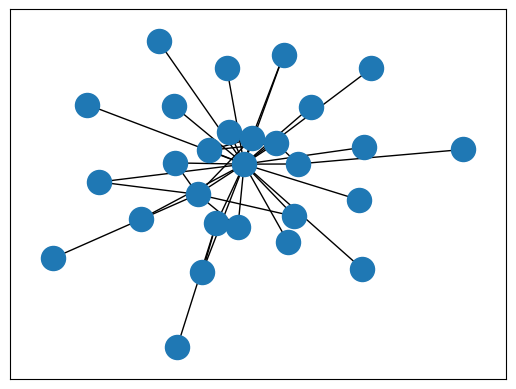

In [7]:
nx.draw_networkx(G, with_labels=False)

The network definitely looks a lot like a spoke and hub system, suggesting a central facilitator. Let's run some statistics.

In [8]:
nx.betweenness_centrality(G)

{'Bill': 0.0,
 'Blacky': 0.011396011396011397,
 'Bruce': 0.0,
 'Charles': 0.0,
 'Dante': 0.07407407407407408,
 'David': 0.0,
 'Donald': 0.0,
 'Doug': 0.0,
 'Fabio': 0.005698005698005698,
 'Frank': 0.0,
 'Gabriel': 0.0,
 'Howard': 0.0,
 'Jenny': 0.0,
 'Kay': 0.8874643874643875,
 'Lara': 0.0,
 'Lorena': 0.0,
 'Louis': 0.0,
 'Marky': 0.0,
 'Marzio': 0.0,
 'Menna': 0.011396011396011397,
 'Peretta': 0.0,
 'Peter': 0.0,
 'Robert': 0.0,
 'Rosa': 0.0,
 'Ross': 0.0,
 'Shawn': 0.0,
 'Steve': 0.0754985754985755,
 'Tommy': 0.08831908831908833}

In [9]:
nx.degree_centrality(G)

{'Bill': 0.037037037037037035,
 'Blacky': 0.18518518518518517,
 'Bruce': 0.037037037037037035,
 'Charles': 0.037037037037037035,
 'Dante': 0.1111111111111111,
 'David': 0.07407407407407407,
 'Donald': 0.07407407407407407,
 'Doug': 0.037037037037037035,
 'Fabio': 0.1111111111111111,
 'Frank': 0.1111111111111111,
 'Gabriel': 0.037037037037037035,
 'Howard': 0.037037037037037035,
 'Jenny': 0.037037037037037035,
 'Kay': 0.8888888888888888,
 'Lara': 0.037037037037037035,
 'Lorena': 0.037037037037037035,
 'Louis': 0.037037037037037035,
 'Marky': 0.037037037037037035,
 'Marzio': 0.07407407407407407,
 'Menna': 0.18518518518518517,
 'Peretta': 0.07407407407407407,
 'Peter': 0.07407407407407407,
 'Robert': 0.037037037037037035,
 'Rosa': 0.037037037037037035,
 'Ross': 0.07407407407407407,
 'Shawn': 0.037037037037037035,
 'Steve': 0.14814814814814814,
 'Tommy': 0.25925925925925924}

In [10]:
nx.eigenvector_centrality(G)

{'Bill': 0.10914784648235058,
 'Blacky': 0.24208528352095485,
 'Bruce': 0.10914784648235058,
 'Charles': 0.10914784648235058,
 'Dante': 0.15596890382984238,
 'David': 0.15741875858791812,
 'Donald': 0.15741875858791812,
 'Doug': 0.10914784648235058,
 'Fabio': 0.18716389059462682,
 'Frank': 0.19656998544745258,
 'Gabriel': 0.10914784648235058,
 'Howard': 0.10914784648235058,
 'Jenny': 0.10914784648235058,
 'Kay': 0.6275743358704476,
 'Lara': 0.10914784648235058,
 'Lorena': 0.10914784648235058,
 'Louis': 0.10914784648235058,
 'Marky': 0.10914784648235058,
 'Marzio': 0.15741875858791812,
 'Menna': 0.2605739987191541,
 'Peretta': 0.15446667561354432,
 'Peter': 0.1388929784890593,
 'Robert': 0.027125925474548625,
 'Rosa': 0.04827091210556753,
 'Ross': 0.15125115631625888,
 'Shawn': 0.02974513200670873,
 'Steve': 0.1710285809149624,
 'Tommy': 0.2775475379112082}

A lot of action appears to go through 'Kay'. Let's visualize the network again and highight 'Kay'.

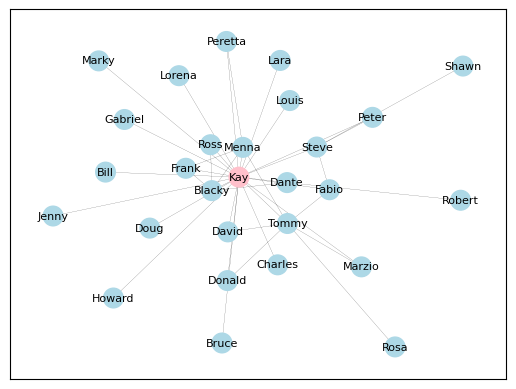

In [11]:
colors = ['lightblue' for n in G]
colors[13] = 'pink'
node_font_sizes = 8
options = {
    'node_color': colors,
    'node_size': 200,
    'linewidths':1,
    'width': 0.1,
    'with_labels': True,
    'font_size': node_font_sizes
}
nx.draw_networkx(G, **options)

Let's see what happens if we remove 'Kay' from the network.

In [12]:
dat1 = dat

In [13]:
# Removing 'Kay' node to see effects
dat1 = dat1.drop('Kay', axis=0)

In [14]:
dat1 = dat1.drop('Kay', axis=1)

In [15]:
# Confirm Kay removed
print(dat1)

         Bill  Blacky  Bruce  Charles  Dante  David  Donald  Doug  Fabio  \
Bill        0       0      0        0      0      0       0     0      0   
Blacky      0       0      0        0      1      0       0     0      0   
Bruce       0       0      0        0      0      0       0     0      0   
Charles     0       0      0        0      0      0       0     0      0   
Dante       0       0      0        0      0      0       0     0      0   
David       0       0      0        0      0      0       0     0      0   
Donald      0       0      0        0      0      0       0     0      0   
Doug        0       0      0        0      0      0       0     0      0   
Fabio       0       0      0        0      0      0       0     0      0   
Frank       0       0      0        0      0      0       0     0      0   
Gabriel     0       0      0        0      0      0       0     0      0   
Howard      0       0      0        0      0      0       0     0      0   
Jenny       

In [16]:
G1 = nx.Graph()

In [17]:
# rebuild nodes for new dat
G1.add_nodes_from(dat1.columns)

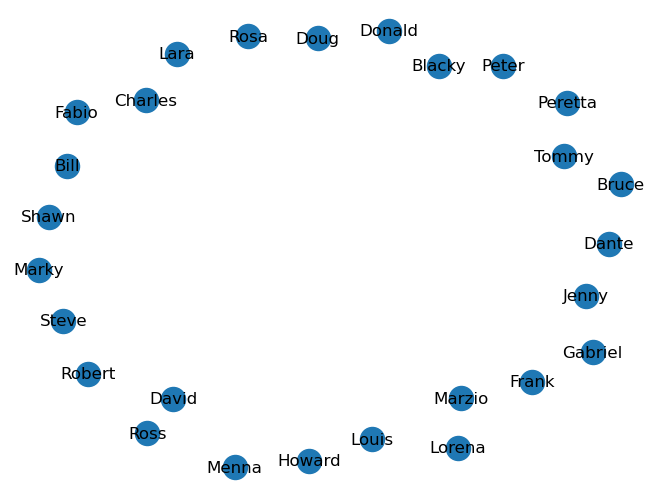

In [18]:
nx.draw(G1, with_labels=True)
plt.show()

In [19]:
# time to add the edges...
for source, row in dat1.items():
    for target, weight in row.items():
        try:
            weight = int(weight)  # df has non-integers. Need to separate them out
            if weight > 0:
                G1.add_edge(source, target, weight=weight)
        except ValueError:
            pass  # Ignore non-numeric values/errors

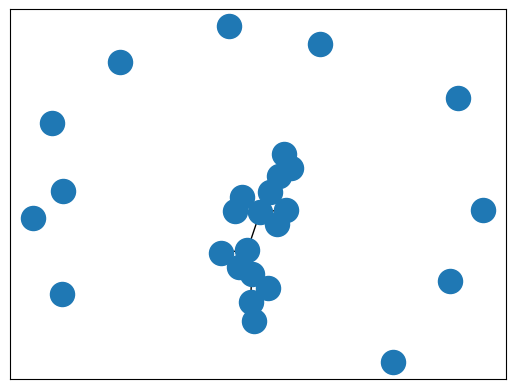

In [20]:
nx.draw_networkx(G1, with_labels=False)

The network looks way less connected now. Let's run the descriptive statistics again.

In [21]:
nx.betweenness_centrality(G1)

{'Bill': 0.0,
 'Blacky': 0.11692307692307692,
 'Bruce': 0.0,
 'Charles': 0.0,
 'Dante': 0.043076923076923075,
 'David': 0.0,
 'Donald': 0.0,
 'Doug': 0.0,
 'Fabio': 0.11076923076923077,
 'Frank': 0.0,
 'Gabriel': 0.0,
 'Howard': 0.0,
 'Jenny': 0.0,
 'Lara': 0.0,
 'Lorena': 0.0,
 'Louis': 0.0,
 'Marky': 0.0,
 'Marzio': 0.0,
 'Menna': 0.18153846153846154,
 'Peretta': 0.0,
 'Peter': 0.0,
 'Robert': 0.0,
 'Rosa': 0.0,
 'Ross': 0.0,
 'Shawn': 0.0,
 'Steve': 0.08307692307692308,
 'Tommy': 0.24}

In [22]:
nx.degree_centrality(G1)

{'Bill': 0.0,
 'Blacky': 0.15384615384615385,
 'Bruce': 0.0,
 'Charles': 0.0,
 'Dante': 0.07692307692307693,
 'David': 0.038461538461538464,
 'Donald': 0.038461538461538464,
 'Doug': 0.0,
 'Fabio': 0.07692307692307693,
 'Frank': 0.07692307692307693,
 'Gabriel': 0.0,
 'Howard': 0.0,
 'Jenny': 0.0,
 'Lara': 0.0,
 'Lorena': 0.0,
 'Louis': 0.0,
 'Marky': 0.0,
 'Marzio': 0.038461538461538464,
 'Menna': 0.15384615384615385,
 'Peretta': 0.038461538461538464,
 'Peter': 0.038461538461538464,
 'Robert': 0.038461538461538464,
 'Rosa': 0.038461538461538464,
 'Ross': 0.038461538461538464,
 'Shawn': 0.038461538461538464,
 'Steve': 0.11538461538461539,
 'Tommy': 0.23076923076923078}

In [23]:
nx.eigenvector_centrality(G1)

{'Bill': 2.896428790240441e-26,
 'Blacky': 0.38823951131565426,
 'Bruce': 2.896428790240441e-26,
 'Charles': 2.896428790240441e-26,
 'Dante': 0.1576342926657699,
 'David': 0.1781731818739465,
 'Donald': 0.1781731818739465,
 'Doug': 2.896428790240441e-26,
 'Fabio': 0.2142447176725243,
 'Frank': 0.31086109163854225,
 'Gabriel': 2.896428790240441e-26,
 'Howard': 2.896428790240441e-26,
 'Jenny': 2.896428790240441e-26,
 'Lara': 2.896428790240441e-26,
 'Lorena': 2.896428790240441e-26,
 'Louis': 2.896428790240441e-26,
 'Marky': 2.896428790240441e-26,
 'Marzio': 0.1781731818739465,
 'Menna': 0.4876996396206593,
 'Peretta': 0.1730797608198826,
 'Peter': 0.036071535798577796,
 'Robert': 0.055942143794427066,
 'Rosa': 0.1781731818739465,
 'Ross': 0.13778133081865965,
 'Shawn': 0.036071535798577796,
 'Steve': 0.10163850722445543,
 'Tommy': 0.502045720149963}

Tommy and Menna, who had very minor roles in the previous model now make up for a good chunk, and many of the nodes (it looks like maybe 11 of them) are separated completely without 'Kay' to connect them to the network.

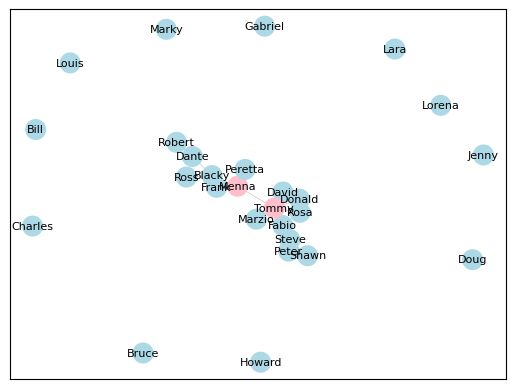

In [25]:
colors = ['lightblue' for n in G1]
colors[18] = 'pink'
colors[26] = 'pink'
node_font_sizes = 8
options = {
    'node_color': colors,
    'node_size': 200,
    'linewidths':1,
    'width': 0.1,
    'with_labels': True,
    'font_size': node_font_sizes
}
nx.draw_networkx(G1, **options)

I'm not one to sanction rewarding bad behavior, but if we give a Netflix subscription to 'Kay', we might, at least for a little bit, slow down the heroin network. Might as well get Tommy and Menna a subscription while we're at it.